In [2]:
import zipfile
with zipfile.ZipFile('./collectedimages_Ankita.zip', 'r') as zip_ref:
    zip_ref.extractall('./images')

In [1]:
%pip install tensorflow
%pip install keras

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import keras

In [7]:
PATH = '.\images\collectedimages'
CLASS_NAMES = ['food', 'house', 'how', 'what', 'who']
BATCH_SIZE = 32

Splitting the dataset into train, test and validation

In [5]:
%pip install split-folders

In [8]:
import splitfolders
import os
print(os.listdir(PATH))

['food', 'house', 'how', 'what', 'who']


In [10]:
splitfolders.ratio(PATH,seed=1337, output='Split_Data', ratio=(0.6, 0.2, 0.2))

Prepare the dataset for training

In [11]:
dataset = tf.keras.utils.image_dataset_from_directory(
    'Split_Data/train/',
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    interpolation='bilinear'
)

Found 68 files belonging to 5 classes.


In [13]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    "Split_Data/val/",
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    interpolation='bilinear'
)

Found 21 files belonging to 5 classes.


In [14]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    "Split_Data/test/",
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    interpolation='bilinear'
)

Found 25 files belonging to 5 classes.


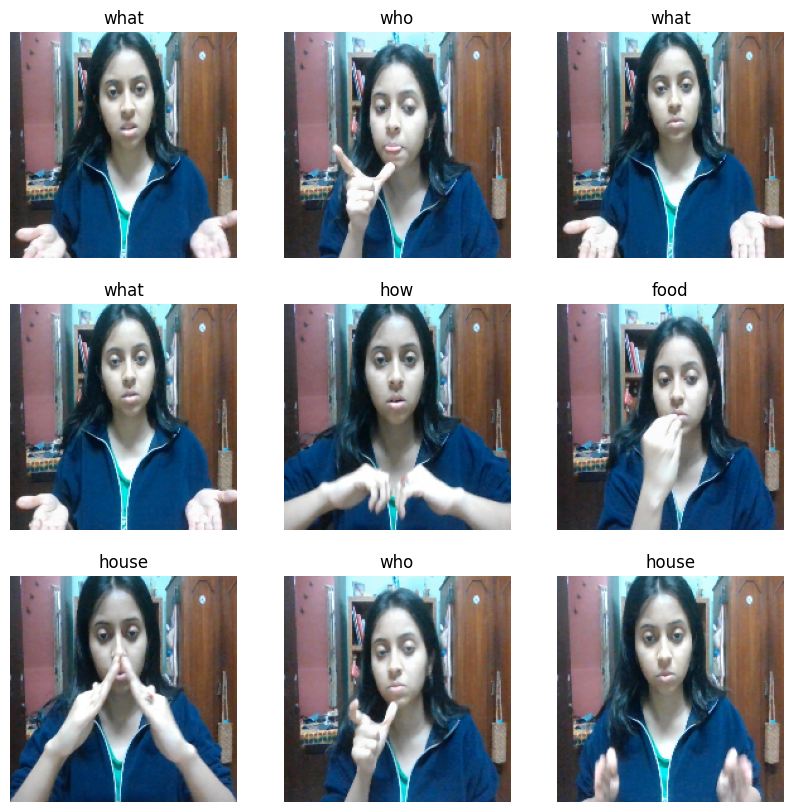

In [16]:
import matplotlib.pyplot as plt

class_names = ['food', 'house', 'how', 'what', 'who']
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [17]:
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

c:\Users\ankig\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [20]:
history = model.fit(
  dataset,
  batch_size=BATCH_SIZE,
  validation_data=validation_dataset,
  epochs=10
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 335ms/step - accuracy: 0.2833 - loss: 1.6501 - val_accuracy: 0.2857 - val_loss: 1.5041
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.4017 - loss: 1.3009 - val_accuracy: 0.5714 - val_loss: 1.1119
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - accuracy: 0.5728 - loss: 1.1041 - val_accuracy: 0.8571 - val_loss: 0.6794
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step - accuracy: 0.8821 - loss: 0.5938 - val_accuracy: 0.9048 - val_loss: 0.4054
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.9472 - loss: 0.2390 - val_accuracy: 1.0000 - val_loss: 0.0850
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.9926 - loss: 0.2173 - val_accuracy: 0.7619 - val_loss: 0.4391
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - accuracy: 0.8302 - loss: 0.4272 - val_accuracy: 1.0000 - val_loss: 0.0622
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.9887 - loss: 0.0375 - val_accuracy: 0.9048 - val_loss:

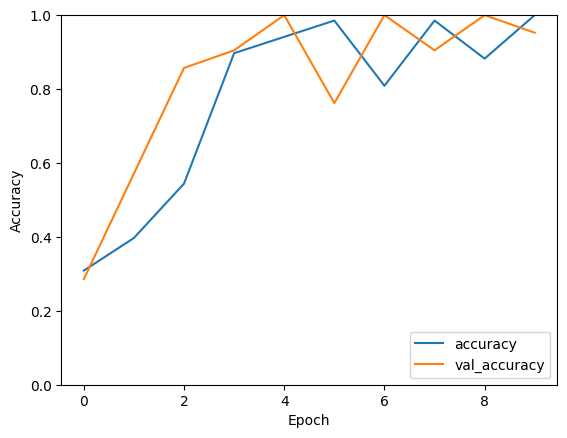

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Testing


In [22]:
test_accuracy = model.evaluate(test_dataset,steps=624)

624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 87us/step - accuracy: 1.0000 - loss: 0.0198   


c:\Users\ankig\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [23]:
%pip install opencv-python

  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [26]:
import cv2

In [29]:
TEST_IMAGE_PATH = './images/collectedimages/food/food.5b4212bc-bc8c-11ee-8eeb-c117c6a84c10.jpg'

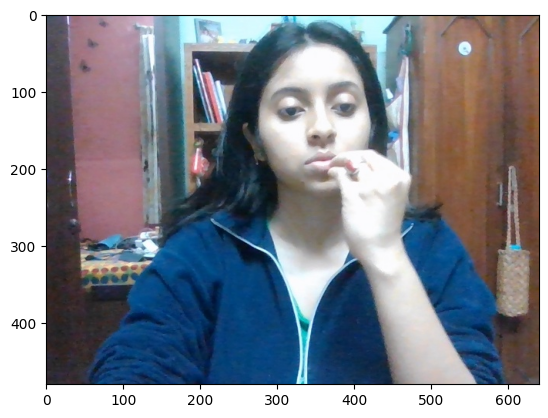

In [30]:
img = cv2.imread(TEST_IMAGE_PATH)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

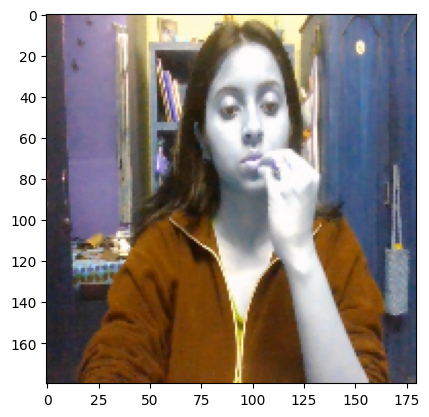

In [31]:
resize = tf.image.resize(img, (180,180))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [32]:
import numpy as np
from keras import models

In [33]:
model = models.load_model('cnn_10ep_ac1_Ankita_testac_1.h5')

In [34]:
prediction = model.predict(np.expand_dims(resize, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


In [35]:
prediction

array([[ 4.262146  , -0.55178577, -2.6689744 , -0.18857928, -0.9283184 ]],
      dtype=float32)

In [36]:
probab = prediction[0]

In [37]:
max(probab)

4.262146

In [38]:
list(probab).index(max(probab))

0

In [39]:
pred_class = list(probab).index(max(probab))
pred_class

0

In [40]:
predictions = np.array(prediction)

predicted_class_index = np.argmax(predictions[0])

# Find the index of the maximum value in the array
#predicted_class_index = np.argmax(predictions)

# Output the predicted class index
print("Predicted class index:", predicted_class_index)

#food', 'house', 'how', 'what', 'who
if predicted_class_index==0: 
    print(f'Predicted class is Food')
elif predicted_class_index==1:
    print(f'Predicted class is House')
elif predicted_class_index==2:
    print(f'Predicted class is How')
elif predicted_class_index==3:
    print(f'Predicted class is What')
elif predicted_class_index==4:
    print(f'Predicted class is Who')

Predicted class index: 0
Predicted class is Food


In [41]:
model.save('cnn_10ep_ac1_Ankita_testac_1.h5')

In [42]:
model.save('cnn_10ep_ac1_Ankita_testac_1.keras')